# SIR Solutions
## September 22nd, 2022
### Overview: The SIR (Susceptible-Infected-Recovered) model is composed of ODEs which describe the trajectory of curves of proportions of the population that are susceptible to, infected with, and recovered from a disease. The solutions of these ODEs can predict how a disease will propagate through a population over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

# Problem 1

Suppose that, in a city of approximately three million, five people who have just become infectious have recently 
entered the city carrying a certain disease. Each of those individuals has one contact each day that could spread 
the disease, and an average of three days is spent in the infectious state. Find the solution of the corresponding
SIR equations using solve_ivp for fifty days, where each time period is half a day, and plot your results. Use the percentages 
of each state, not the actual number of people in the state. 

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the t-values paramter in solve_ivp to pass in an array of t-values.

In [75]:
def prob1():
    #beta = 1 b/c each individual has only one contact each day; assuming this will be true for all later infected people
    #gamma = 1/3 b/c it is the reciprocal of the average time spent in the infectious stage, which is 3 days
    b, g = 1., 1/3
    
    #defining SIR ODE system 
    def ode(t,y):
        return np.array([
            -b*y[1]*y[0],
            b*y[1]*y[0] - g*y[1],
            g*y[1]
        ])
    
    #starting at day 1, ending at day 50
    t0 = 1
    tf = 50
    
    #inital conditions for model REMEMBER THESE ARE PROPORTIONS OF TOTAL POP
    #all but 5 start out susceptible, 0 recovered
    y0 = np.array([
        (3e6-5)/3e6,  
        5./3e6, 
        0.
    ])
    
    #solve the system, evaluate at intervals of half days
    sol = solve_ivp(ode,(t0,tf),y0,t_eval=np.arange(1,50.5,0.5))
    
    plt.rcParams["figure.figsize"] = (20,10) #make plots big
    plt.rcParams.update({'font.size': 22})
    
    #plot each solution
    plt.plot(sol.t,sol.y[0],color='r',label='S(t)')
    plt.plot(sol.t,sol.y[1],color='b',label='I(t)')
    plt.plot(sol.t,sol.y[2],color='g',label='R(t)')
    plt.xlabel('day')
    plt.ylabel('percentage of population')
    plt.title('SIR Model')
    plt.legend()
    plt.show()
    
    #get day of max infection and that proportion
    max_day = sol.t[np.argmax(sol.y[1])]
    max_prop = np.max(sol.y[1])
    print('At the peak of the infection at time t=',sol.t[np.argmax(sol.y[1])],' days, ', (1-max_prop)*100,
          '% of the population (',round((1-max_prop)*3e7),' people) can still work.' ,sep='')

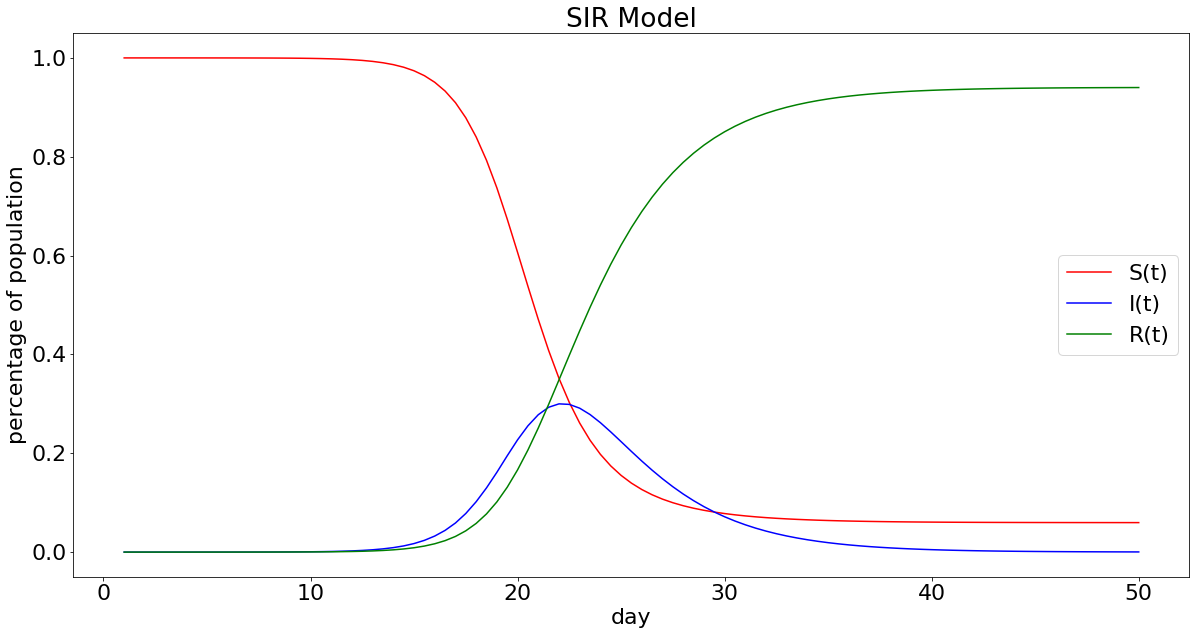

At the peak of the infection at time t=22.0 days, 70.0055138818967% of the population (21001654 people) can still work.


In [76]:
prob1()

# Problem 2

On March 11, 2020, New York City had 52 confirmed cases of Covid-19. On that day New York started its 
lock-down measures. Using the following information, model what the spread of the virus could have 
been if New York did not implement any measures to curb the spread of the virus over the next 150 days:
    there are approximately 8.399 million people in New York city,
    the average case of Covid-19 lasts for 10 days, 
    and each infected person can spread the virus to 2.5 people.

Plot your results for each day.

1) At the projected peak, how many concurrent active cases are there?

2) Assuming that about 5% of Covid-19 cases require hospitalization, and using the fact that there are 
about 58,000 hospital beds in NYC, how much over capacity will the hospitals in NYC be at the projected peak?

In [52]:
def prob2():
    '''
    Using the SIR model, plot a graph that models the
    spead of a disease in NYC and answer the questions.
    1. the projected peak concurent cases
    2. capacity deficit at the projected peak

    returns:
        ans1, ans2: answers to questions 1 and 2
    '''
    #beta: can infect 2.5 per day per person, gamma: infection lasts 10 days
    b, g = .25, 0.1
    #save population value
    pop = 8.399e6
    
    #defining SIR ODE system 
    def ode(t,y):
        return np.array([
            -b*y[1]*y[0],
            b*y[1]*y[0] - g*y[1],
            g*y[1]
        ])
    
    #starting at day 1, ending at day 150
    t0 = 0
    tf = 150
    
    #initial y vector: 52 initally infected
    y0 = np.array([
        (pop-52)/pop,
        52/pop,
        0.
    ])
    
    #solve the system, evaluate at intervals of half days
    sol = solve_ivp(ode,(t0,tf),y0,t_eval=np.arange(0,150.5,0.5))
    
    #plot each solution
    plt.plot(sol.t,sol.y[0],color='r',label='S(t)')
    plt.plot(sol.t,sol.y[1],color='b',label='I(t)')
    plt.plot(sol.t,sol.y[2],color='g',label='R(t)')
    plt.xlabel('days since March 11th')
    plt.ylabel('percentage of population')
    plt.title('NYC Covid SIR Model')
    plt.legend()
    plt.show()
    
    #get pop proportion and day of max infection
    max_prop = np.max(sol.y[1])
    max_day  = sol.t[np.argmax(sol.y[1])]
    
    print('The projected peak is on day ',max_day,' with a number of ',round(max_prop*pop),' infected people.',sep='')
    
    #number of beds needed minus total number of beds
    bed_diff = round(0.05 * max_prop * pop) - 58000
    
    print('At the projected peak, there will be a lack of',bed_diff,'beds.')
    
    return round(max_prop*pop), bed_diff

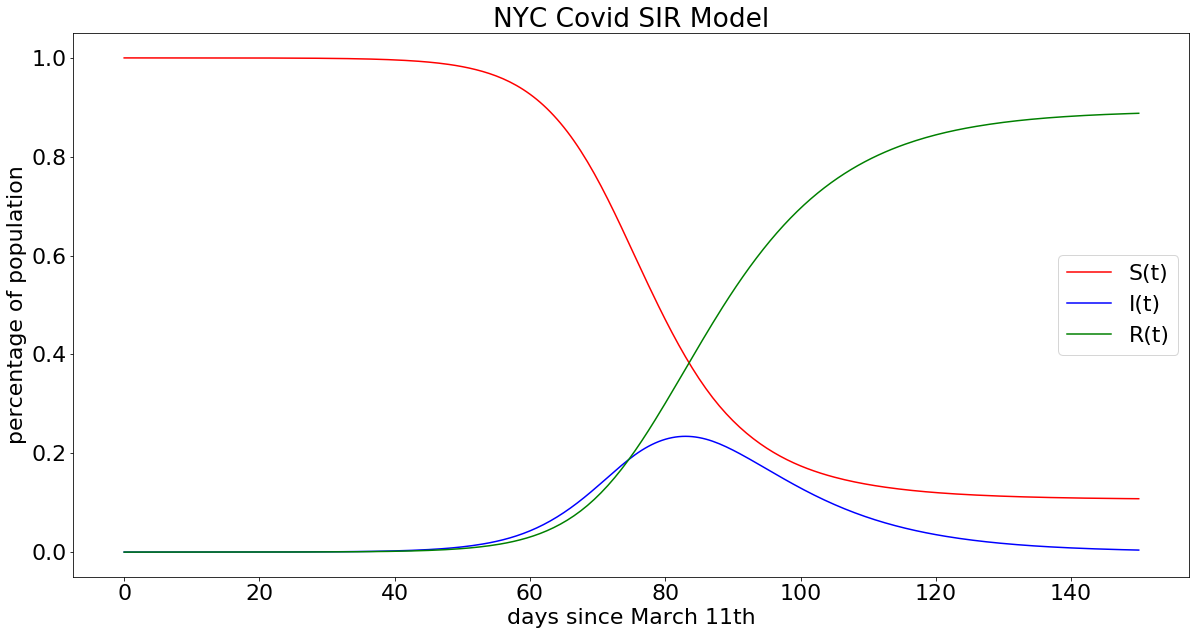

The projected peak is on day 83.0 with a number of 1967560 infected people.
At the projected peak, there will be a lack of 40378 beds.


(1967560, 40378)

In [77]:
prob2()

# Problem 3

There are 7 billion people in the world. Suppose that influenza originates with 1000 people, and that they are contagious for 10 days before recovering.
Also suppose that on average someone makes one contact every two days that could spread the flu.
Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with probability f=1/50. To assure a steady population, let the birth rate balance out the death rate, and in particular let μ=.0001.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a year span 365 days with one point for each day.

In [79]:
def prob3():
    '''
    Use the SIRS model to examine the spread of the 
    flu over the course of a year
    '''
    # 1 contact made every 2 days, infected for 10 days, prob to be infected again: f = 1/50, birth/death rate: mu = 0.0001
    b, g, f, u = 0.5, 0.1, 0.02, 0.0001
    
    #world population lol
    pop = 7e9
    
    #SIRS ode system
    def ode(t,y):
        return np.array([
            f*y[2] + u*(1-y[0]) - b*y[1]*y[0],
            b*y[1]*y[0] - (g + u)*y[1],
            -f*y[2] + g*y[1] - u*y[2]
        ])
    
    #time interval
    t0 = 1
    tf = 365
    
    #initial conditions
    y0 = np.array([
        (pop-1000)/pop,
        1000/pop,
        0
    ])
    
    #solve the system, evaluate at intervals of half days
    sol = solve_ivp(ode,(t0,tf),y0,t_eval=np.arange(1,365.5,0.5))
    
    #plot each solution
    plt.plot(sol.t,sol.y[0],color='r',label='S(t)')
    plt.plot(sol.t,sol.y[1],color='b',label='I(t)')
    plt.plot(sol.t,sol.y[2],color='g',label='R(t)')
    plt.xlabel('day')
    plt.ylabel('percentage of population')
    plt.title('Flu SIRS Model')
    plt.legend()
    plt.show()

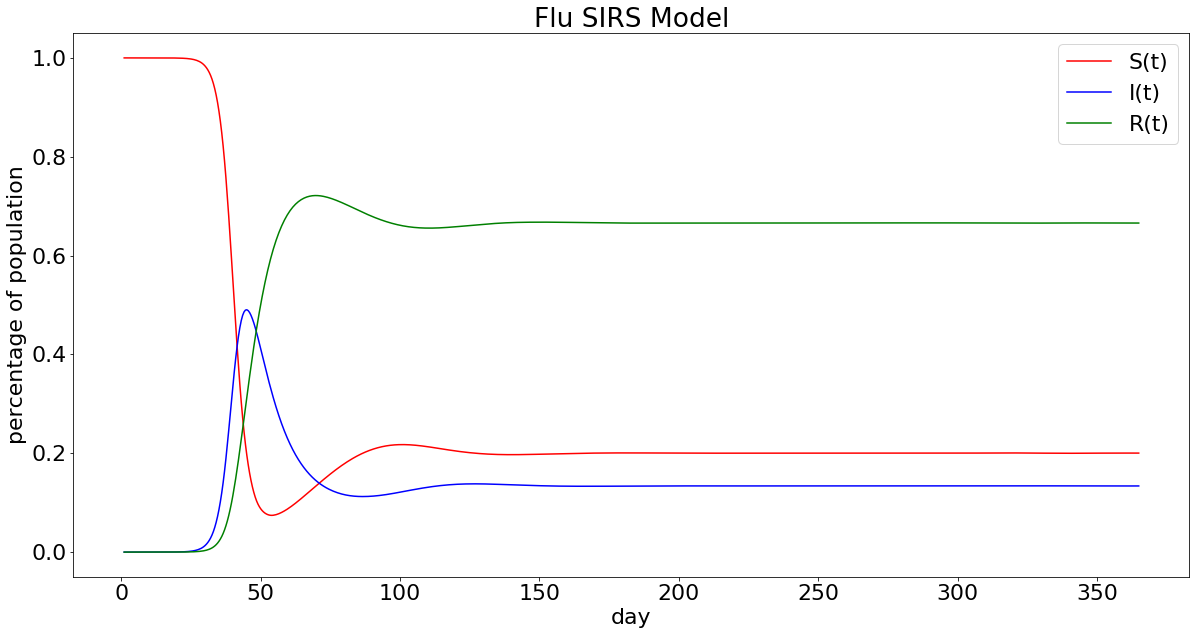

In [80]:
prob3()

# Problem 4

Fit the PGED model to the Covid-19 data provided in new_york_cases.npy.
Print the optimal values of alpha and T_G, and plot your results against 1-S(t).
Use one point for each day.

In [94]:
def prob4():
    '''
    Find the best parameters to fit the PEGD model
    to the data provided in new_york_cases.npy

    Plot the data against 1-S(t)
    '''
    #pop of nyc
    pop = 8.399e6
    
    ys = np.load('new_york_cases.npy')/pop
    ts = np.arange(1,len(ys)+1)
    
    def fun(params):
        #unpack parameters
        B, a, T = params
        
        #get model output with params
        out = B * (ts**a) * np.exp(-ts/T)
        
        #difference from target values
        diff = out - ys
        
        return np.linalg.norm(diff)
    
    #initial guess for params
    p0 = (1,1,50)
    
    #get best params from minimize object
    B, a, T = minimize(fun,p0)
    
    #pged function for plotting
    def pged(ts):
        return B * (ts**a) * np.exp(-ts/T)
    
    #plot
    plt.plot(ts,ys,label='data')
    plt.plot(ts,pged(ts),label='pged' )
    plt.xlabel('days since March 11th')
    plt.ylabel('percentage of population')
    plt.title('NYC Covid SIR Model')
    plt.legend()
    plt.show()

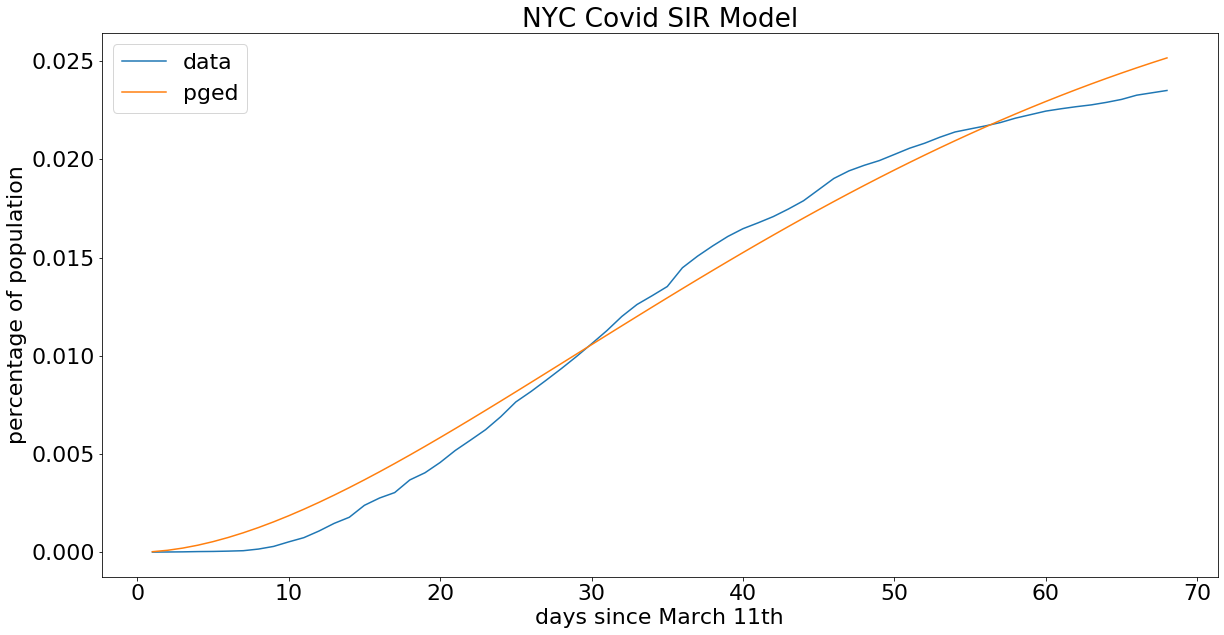

In [95]:
prob4()

# Problem 5

In [163]:
def prob5():
    '''
    Use solve_bvp to model the measles boundary value problem
    '''
    #constants
    b1, b0, n, l,u = 1, 1575, 0.01, 0.0279, 0.02
    
    #given ode system
    def ode(t,y):
        b = b0 * (1 + b1*np.cos(2*np.pi*t))
        return np.array([
            u - b*y[0]*y[2],
            b*y[0]*y[2] - y[1]/l,
            y[1]/l - y[2]/n,
            np.zeros(len(y[0])),
            np.zeros(len(y[0])),
            np.zeros(len(y[0]))
        ])
    
    #define boundary conditions
    def bcs(ya,yb):
        BCa = ya[0 : 3] - ya[3 :] #boundary conditions on the left
        BCb = yb[0 : 3] - yb[3 :] #boundary conditions on the right
        return np.hstack((BCa,BCb))
    
    #create linspace for the one year
    X = np.linspace(0,1,200)
    y0 = np.array([0.075,0,0.0001,0.075,0,0.0001]).reshape((-1,1))*np.ones((6, len(X)))
    
    #solve boundary problem
    sol = solve_bvp(ode, bcs, X, y0)
    
    #plot
    plt.plot(X,sol.y[0],label='S(t)')
    plt.plot(X,sol.y[1],label='E(t)')
    plt.plot(X,sol.y[2],label='I(t)')
    plt.title("Measels Outbreak")
    plt.xlabel("Proportion of Year")
    plt.ylabel("Proportion of Population")
    plt.legend()
    plt.show()

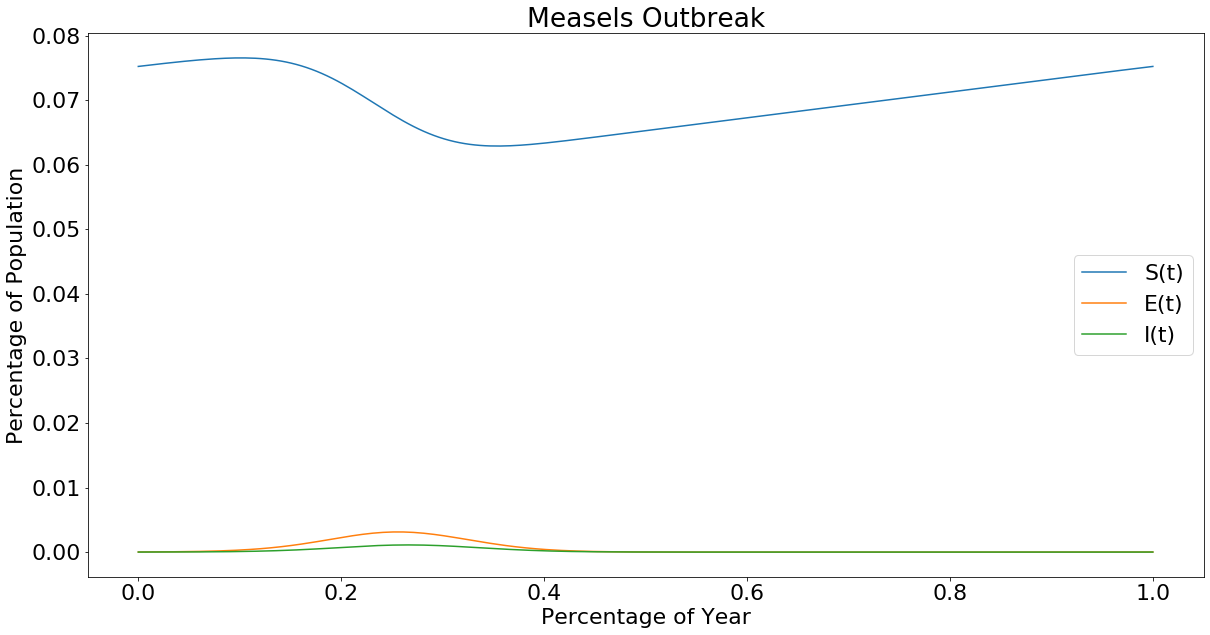

In [164]:
prob5()